In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn as sk
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split

In [48]:
Data = pd.read_csv('GOOGL.csv')
Data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
5,2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094898
6,2004-08-27,54.104103,54.364365,52.897900,53.128128,53.128128,6211782
7,2004-08-30,52.692692,52.797798,51.056057,51.056057,51.056057,5196798
8,2004-08-31,51.201202,51.906906,51.131130,51.236237,51.236237,4917877
9,2004-09-01,51.401402,51.536537,49.884884,50.175175,50.175175,9138253


In [49]:
Data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
4430,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


In [50]:
#Now that we have imported the data we need to understand some things
#1 what is our dataset saying to us 
#2 what are the  problems of our data
#3 what are the things not needed in my dataset
#4 which algorithm should i use is it supervised or unsupervised
#5 if supervised which algorithm is the best to solve my problem

In [51]:
def missing_data(Data):
    missing_data_count = Data.isnull().sum()*100 / Data.shape[0]
    Data_missing_count = pd.DataFrame(missing_data_count).round(2)
    Data_missing_count = Data_missing_count.reset_index().rename(
               columns= {
                       'index': 'Column',
                        0 : 'Missing_Percentage',
               }
)
    Data_missing_value = Data.isnull().sum()
    Data_missing_value = Data_missing_value.reset_index().rename(
                columns= {
                    'index': 'Column',
                     0: 'Missing_Count',
                }
)
    Final = Data_missing_value.merge(Data_missing_count,how = 'inner', left_on = 'Column', right_on = 'Column')  
    Final = Final.sort_values(by = 'Missing_Count', ascending = False)
    return Final

missing_data(Data)

,Column,Missing_Count,Missing_Percentage
0,Date,0,0.0
1,Open,0,0.0
2,High,0,0.0
3,Low,0,0.0
4,Close,0,0.0
5,Adj Close,0,0.0
6,Volume,0,0.0


In [52]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [53]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [54]:
len(Data)

4431

In [55]:
Data['Date'] = pd.to_datetime(Data['Date'])
Data.set_index('Date',inplace=True)

In [56]:
Data.shape

(4431, 6)

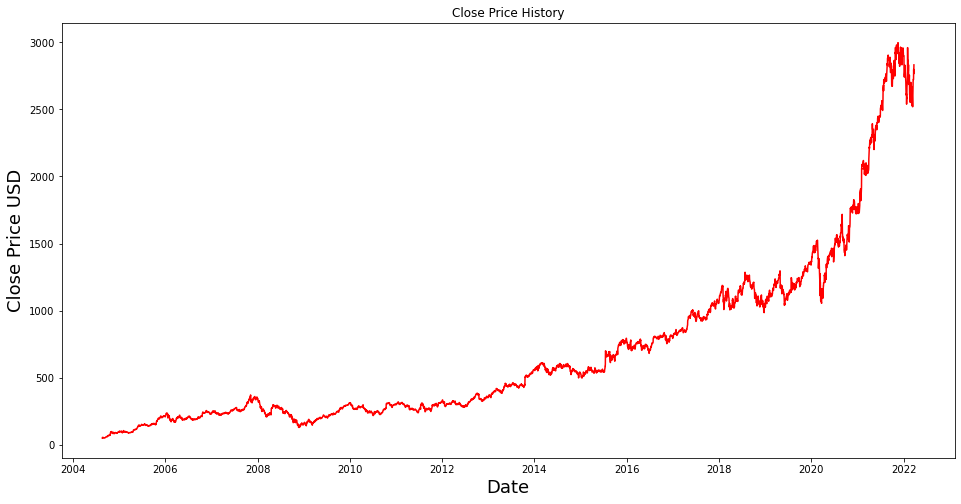

In [57]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(Data['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [58]:
Shares_price = pd.DataFrame(Data["Close"]).rename(columns={"Close": "Price"})  
Shares_price.head(10)

,Price
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055
2004-08-26,54.009010
2004-08-27,53.128128
2004-08-30,51.056057
2004-08-31,51.236237


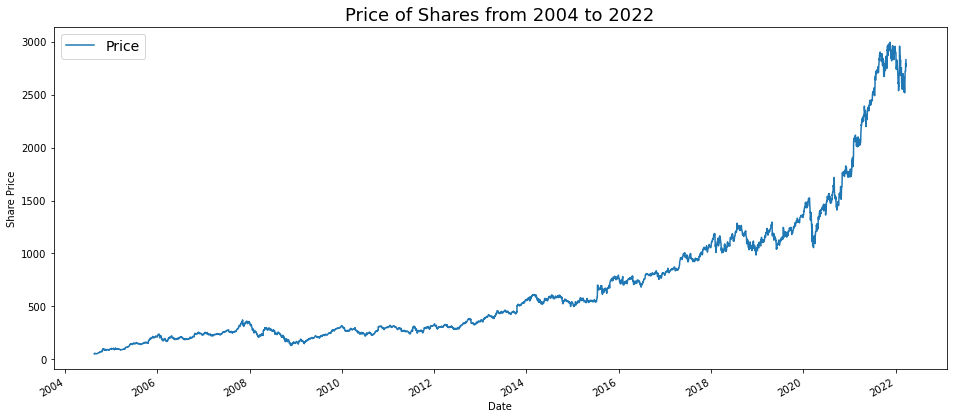

In [59]:
import matplotlib.pyplot as plt
Shares_price.plot(figsize=(16, 7))
plt.xlabel('Date')
plt.ylabel("Share Price")
plt.title("Price of Shares from 2004 to 2022", fontsize=18)
plt.legend(fontsize=14);

In [60]:
timesteps = Shares_price.index.to_numpy()
prices = Shares_price["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2004-08-19T00:00:00.000000000', '2004-08-20T00:00:00.000000000',
        '2004-08-23T00:00:00.000000000', '2004-08-24T00:00:00.000000000',
        '2004-08-25T00:00:00.000000000', '2004-08-26T00:00:00.000000000',
        '2004-08-27T00:00:00.000000000', '2004-08-30T00:00:00.000000000',
        '2004-08-31T00:00:00.000000000', '2004-09-01T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([50.220219, 54.209209, 54.754753, 52.487488, 53.053055, 54.00901 ,
        53.128128, 51.056057, 51.236237, 50.175175]))

In [61]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(3544, 887, 3544, 887)

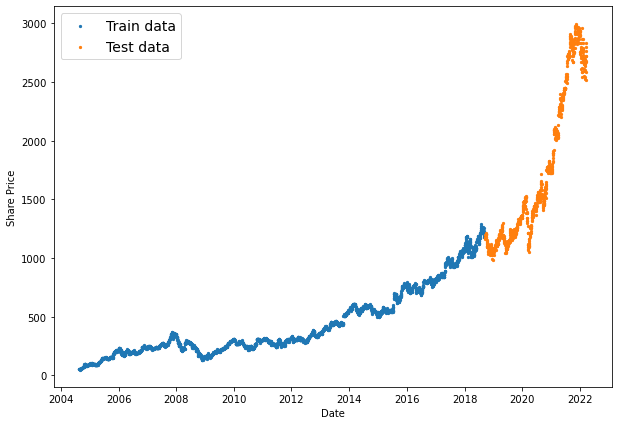

In [62]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Share Price")
plt.legend(fontsize=14)
plt.show();

In [63]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Share Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

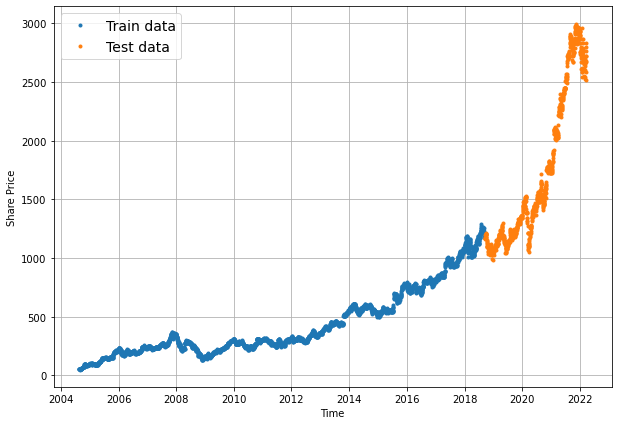

In [64]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [65]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [66]:
def get_labelled_windows(x, horizon=1):
      
  return x[:, :-horizon], x[:, -horizon:]

In [67]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [68]:
def make_windows(x, window_size=7, horizon=1):
      
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [69]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(4401, 4401)

In [70]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [50.220219 54.209209 54.754753 52.487488 53.053055 54.00901  53.128128
 51.056057 51.236237 50.175175 50.805805 50.055054 50.840839 51.201202
 51.206207 52.717716 53.803802 55.8008   56.056057 57.042042 58.803802
 59.739738 58.978977 59.249249 60.47047  59.974976 59.18919  63.493492
 65.605606 64.864868] -> Label: [66.356354]
Window: [54.209209 54.754753 52.487488 53.053055 54.00901  53.128128 51.056057
 51.236237 50.175175 50.805805 50.055054 50.840839 51.201202 51.206207
 52.717716 53.803802 55.8008   56.056057 57.042042 58.803802 59.739738
 58.978977 59.249249 60.47047  59.974976 59.18919  63.493492 65.605606
 64.864868 66.356354] -> Label: [67.597595]
Window: [54.754753 52.487488 53.053055 54.00901  53.128128 51.056057 51.236237
 50.175175 50.805805 50.055054 50.840839 51.201202 51.206207 52.717716
 53.803802 55.8008   56.056057 57.042042 58.803802 59.739738 58.978977
 59.249249 60.47047  59.974976 59.18919  63.493492 65.605606 64.864868
 66.356354 67.597595] -> Label: [69.

In [71]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [2784.02002  2787.97998  2831.840088 2772.399902 2685.649902 2710.52002
 2732.169922 2754.76001  2650.780029 2608.060059 2596.27002  2551.76001
 2653.820068 2689.189941 2701.139893 2681.22998  2691.429932 2677.98999
 2638.129883 2527.570068 2542.090088 2668.399902 2648.590088 2597.409912
 2519.02002  2583.959961 2665.610107 2676.780029 2722.51001  2722.030029] -> Label: [2797.360107]
Window: [2787.97998  2831.840088 2772.399902 2685.649902 2710.52002  2732.169922
 2754.76001  2650.780029 2608.060059 2596.27002  2551.76001  2653.820068
 2689.189941 2701.139893 2681.22998  2691.429932 2677.98999  2638.129883
 2527.570068 2542.090088 2668.399902 2648.590088 2597.409912 2519.02002
 2583.959961 2665.610107 2676.780029 2722.51001  2722.030029 2797.360107] -> Label: [2765.51001]
Window: [2831.840088 2772.399902 2685.649902 2710.52002  2732.169922 2754.76001
 2650.780029 2608.060059 2596.27002  2551.76001  2653.820068 2689.189941
 2701.139893 2681.22998  2691.429932 2677.98999  2638.12

In [72]:
def mean_absolute_scaled_error(y_true, y_pred):
      mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
      mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)
      return mae / mae_naive_no_season

In [73]:
def evaluate_preds(y_true, y_pred):
      # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [74]:
def make_train_test_splits(windows, labels, test_split=0.2):
    
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [75]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3520, 881, 3520, 881)

In [76]:
train_windows[:5], train_labels[:5]

(array([[50.220219, 54.209209, 54.754753, 52.487488, 53.053055, 54.00901 ,
         53.128128, 51.056057, 51.236237, 50.175175, 50.805805, 50.055054,
         50.840839, 51.201202, 51.206207, 52.717716, 53.803802, 55.8008  ,
         56.056057, 57.042042, 58.803802, 59.739738, 58.978977, 59.249249,
         60.47047 , 59.974976, 59.18919 , 63.493492, 65.605606, 64.864868],
        [54.209209, 54.754753, 52.487488, 53.053055, 54.00901 , 53.128128,
         51.056057, 51.236237, 50.175175, 50.805805, 50.055054, 50.840839,
         51.201202, 51.206207, 52.717716, 53.803802, 55.8008  , 56.056057,
         57.042042, 58.803802, 59.739738, 58.978977, 59.249249, 60.47047 ,
         59.974976, 59.18919 , 63.493492, 65.605606, 64.864868, 66.356354],
        [54.754753, 52.487488, 53.053055, 54.00901 , 53.128128, 51.056057,
         51.236237, 50.175175, 50.805805, 50.055054, 50.840839, 51.201202,
         51.206207, 52.717716, 53.803802, 55.8008  , 56.056057, 57.042042,
         58.803802, 59.

In [77]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [78]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [79]:
import tensorflow as tf
from keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
28/28 [==============================] - 4s 89ms/step - loss: 25.8334 - mae: 25.8334 - val_loss: 70.8082 - val_mae: 70.8082
Epoch 2/100
28/28 [==============================] - 3s 111ms/step - loss: 18.0669 - mae: 18.0669 - val_loss: 67.1926 - val_mae: 67.1926
Epoch 3/100
28/28 [==============================] - 3s 121ms/step - loss: 15.2303 - mae: 15.2303 - val_loss: 51.4239 - val_mae: 51.4239
Epoch 4/100
28/28 [==============================] - 3s 114ms/step - loss: 13.1476 - mae: 13.1476 - val_loss: 47.5924 - val_mae: 47.5924
Epoch 5/100
28/28 [==============================] - 0s 14ms/step - loss: 11.6676 - mae: 11.6676 - val_loss: 51.6697 - val_mae: 51.6697
Epoch 6/100
28/28 [==============================] - 4s 146ms/step - loss: 11.2021 - mae: 11.2021 - val_loss: 39.6112 - val_mae: 39.6112
Epoch 7/100
28/28 [==============================] - 0s 14ms/step - loss: 11.6043 - mae: 11.6043 - val_loss: 40.4705 - val_mae: 40.4705
Epoch 8/100
28/28 [=========================

In [80]:
model_1.evaluate(test_windows, test_labels)

28/28 [==============================] - 0s 5ms/step - loss: 25.8798 - mae: 25.8798


[25.879785537719727, 25.879785537719727]

In [81]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

28/28 [==============================] - 0s 3ms/step - loss: 25.2750 - mae: 25.2750


[25.274965286254883, 25.274965286254883]

In [82]:
def make_preds(model, input_data):
    
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [83]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

28/28 [==============================] - 0s 2ms/step


(881,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1183.3151, 1184.027 , 1191.0721, 1205.1763, 1203.4696, 1199.0289,
        1208.4021, 1210.7723, 1188.6742, 1177.2635], dtype=float32)>)

In [84]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 25.274967,
 'mse': 1282.0963,
 'rmse': 35.806374,
 'mape': 1.485918,
 'mase': 1.1367728}

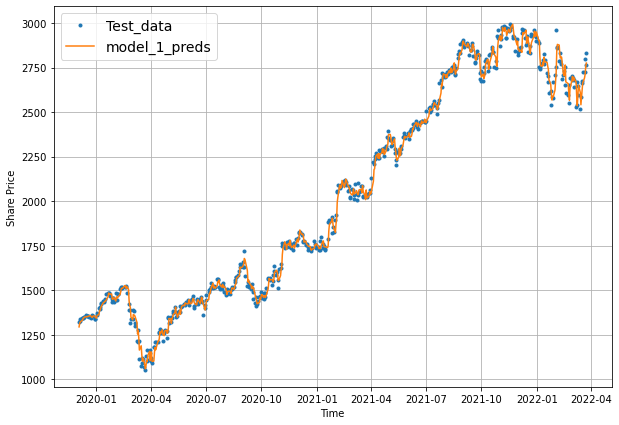

In [85]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [86]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [87]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(4401, 4401)

In [88]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [89]:
model_2.evaluate(test_windows, test_labels)

28/28 [==============================] - 0s 2ms/step - loss: 35.9524


35.95236587524414

In [90]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

28/28 [==============================] - 0s 1ms/step - loss: 24.9266


24.926570892333984

In [91]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

28/28 [==============================] - 0s 1ms/step


In [92]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 24.926579,
 'mse': 1304.5192,
 'rmse': 36.11813,
 'mape': 1.4764894,
 'mase': 1.1211035}

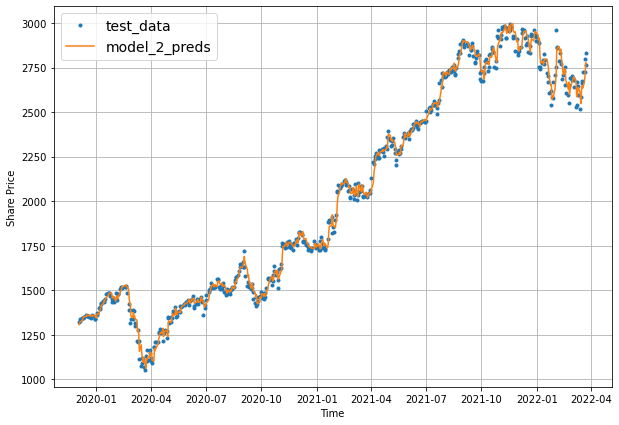

In [93]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [94]:
# Block reward values
block_reward_1 = 50 
block_reward_2 = 25 
block_reward_3 = 12.5 
block_reward_4 = 6.25 

block_reward_2_datetime = np.datetime64("2004-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [95]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - Shares_price.index[0]).days
block_reward_3_days = (block_reward_4_datetime - Shares_price.index[0]).days
block_reward_2_days, block_reward_3_days

(4342, 5744)

In [96]:
# Add block_reward column
Google_prices_block = Shares_price.copy()
Google_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
Google_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
Google_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
Google_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
Google_prices_block.head()

,Price,block_reward
Date,,
2004-08-19,50.220219,25
2004-08-20,54.209209,25
2004-08-23,54.754753,25
2004-08-24,52.487488,25
2004-08-25,53.053055,25


In [97]:
Google_prices_windowed = Google_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  Google_prices_windowed[f"Price+{i+1}"] = Google_prices_windowed["Price"].shift(periods=i+1)
Google_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8,...,Price+21,Price+22,Price+23,Price+24,Price+25,Price+26,Price+27,Price+28,Price+29,Price+30
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.220219,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,54.209209,25,50.220219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,54.754753,25,54.209209,50.220219,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,52.487488,25,54.754753,54.209209,50.220219,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-25,53.053055,25,52.487488,54.754753,54.209209,50.220219,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-26,54.009010,25,53.053055,52.487488,54.754753,54.209209,50.220219,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-27,53.128128,25,54.009010,53.053055,52.487488,54.754753,54.209209,50.220219,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-30,51.056057,25,53.128128,54.009010,53.053055,52.487488,54.754753,54.209209,50.220219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-31,51.236237,25,51.056057,53.128128,54.009010,53.053055,52.487488,54.754753,54.209209,50.220219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Train model on entire data to make prediction for the next day 
X_all = Google_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = Google_prices_windowed.dropna()["Price"].to_numpy()

In [99]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 30), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [100]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_3.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [142]:
INTO_FUTURE = 17

In [143]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [144]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_3,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)


1/1 [==============================] - 0s 90ms/step
Predicting on: 
 [2772.399902 2685.649902 2710.52002  2732.169922 2754.76001  2650.780029
 2608.060059 2596.27002  2551.76001  2653.820068 2689.189941 2701.139893
 2681.22998  2691.429932 2677.98999  2638.129883 2527.570068 2542.090088
 2668.399902 2648.590088 2597.409912 2519.02002  2583.959961 2665.610107
 2676.780029 2722.51001  2722.030029 2797.360107 2765.51001  2831.439941] -> Prediction: 2672.49267578125

1/1 [==============================] - 0s 50ms/step
Predicting on: 
 [2685.649902   2710.52002    2732.169922   2754.76001    2650.780029
 2608.060059   2596.27002    2551.76001    2653.820068   2689.189941
 2701.139893   2681.22998    2691.429932   2677.98999    2638.129883
 2527.570068   2542.090088   2668.399902   2648.590088   2597.409912
 2519.02002    2583.959961   2665.610107   2676.780029   2722.51001
 2722.030029   2797.360107   2765.51001    2831.439941   2672.49267578] -> Prediction: 2640.37451171875

1/1 [=========

In [145]:
future_forecast[:10]

[2672.4927,
 2640.3745,
 2647.7046,
 2672.1438,
 2684.1772,
 2652.9268,
 2634.4438,
 2610.2725,
 2590.1067,
 2601.5432]

In [146]:
def get_future_dates(start_date, into_future, offset=1):
      
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [147]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = Shares_price.index[-1]
last_timestep

Timestamp('2022-03-24 00:00:00')

In [148]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
       '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
       '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
       '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
       '2022-04-10'], dtype='datetime64[D]')

In [150]:
import csv
from datetime import datetime

timesteps = []
Google_price = []
with open("./GOOGL.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(Data.index[-1]) # get the dates as dates (not strings), strptime = string parse time
    Google_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], Google_price[:10]

([Timestamp('2022-03-24 00:00:00'),
  Timestamp('2022-03-24 00:00:00'),
  Timestamp('2022-03-24 00:00:00'),
  Timestamp('2022-03-24 00:00:00'),
  Timestamp('2022-03-24 00:00:00'),
  Timestamp('2022-03-24 00:00:00'),
  Timestamp('2022-03-24 00:00:00'),
  Timestamp('2022-03-24 00:00:00'),
  Timestamp('2022-03-24 00:00:00'),
  Timestamp('2022-03-24 00:00:00')],
 [52.082081,
  54.594597,
  56.796799,
  55.855858,
  54.054054,
  54.02903,
  54.364365,
  52.797798,
  51.906906,
  51.536537])

In [151]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, Google_price[-1])
next_time_steps, future_forecast

(array(['2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27',
        '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
        '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
        '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
        '2022-04-09', '2022-04-10'], dtype='datetime64[D]'),
 array([2832.38  , 2672.4927, 2640.3745, 2647.7046, 2672.1438, 2684.1772,
        2652.9268, 2634.4438, 2610.2725, 2590.1067, 2601.5432, 2611.4526,
        2626.5845, 2612.0989, 2627.3342, 2616.7717, 2612.4597, 2607.9216],
       dtype=float32))

In [152]:
Shares_price.shape

(4431, 1)

In [153]:
next_time_steps


array(['2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27',
       '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
       '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
       '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
       '2022-04-09', '2022-04-10'], dtype='datetime64[D]')

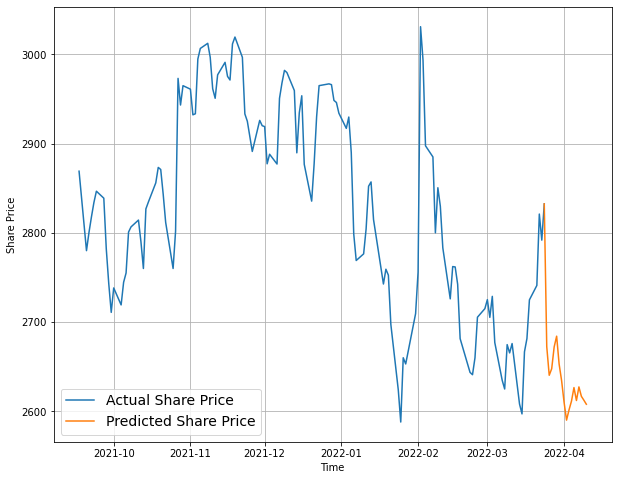

In [165]:
plt.figure(figsize=(10, 8))
plot_time_series(Shares_price.index, Google_price, start=4300, format="-", label="Actual Share Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted Share Price")

In [166]:
model_results = pd.DataFrame({"model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
model_1_dense_w7_h1,25.274967,1282.096313,35.806374,1.485918,1.136773
model_2_dense_w30_h1,24.926579,1304.519165,36.118130,1.476489,1.121104


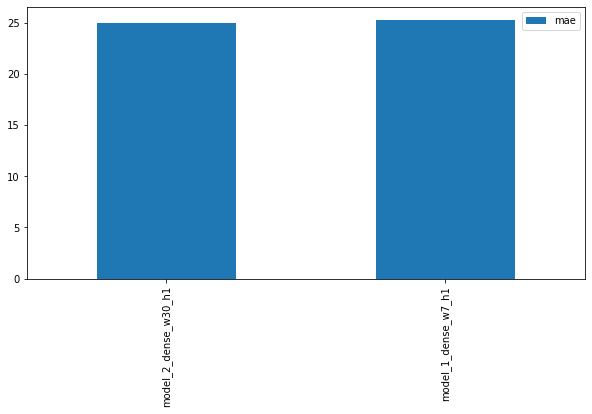

In [171]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 5), kind="bar");